In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import KFold

d:\python 3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv("data.csv")
data

,No,ID,JK,Kecamatan,Jenis_Tinggal,Alat_Transportasi,Penerima_KPS,Pekerjaan_Ayah,Penghasilan_Ayah,Pekerjaan_Ibu,Penghasilan_Ibu,Rombel_Saat_Ini,Penerima_KIP,Layak_PIP
0,1,1,L,Kec. Tenayan Raya,Bersama orang tua,Sepeda motor,Tidak,PNS/TNI/Polri,"Rp. 2,000,000 - Rp. 4,999,999",PNS/TNI/Polri,"Rp. 2,000,000 - Rp. 4,999,999",X MIPA 6,Tidak,Tidak
1,2,2,L,Kec. Tenayan Raya,Bersama orang tua,Sepeda motor,Tidak,Wiraswasta,"Rp. 2,000,000 - Rp. 4,999,999",Pedagang Kecil,"Kurang dari Rp. 500,000",XI MIPA 7,Tidak,Tidak
2,3,3,L,Kec. Tenayan Raya,Bersama orang tua,Ojek,Tidak,Sudah Meninggal,Tidak Berpenghasilan,Tidak bekerja,Tidak Berpenghasilan,XI IPS 3,Tidak,Tidak
3,4,4,L,Kec. Marpoyan Damai,Bersama orang tua,Sepeda motor,Tidak,Karyawan Swasta,"Rp. 5,000,000 - Rp. 20,000,000",Tidak bekerja,Tidak Berpenghasilan,XII MIPA 3,Tidak,Tidak
4,5,5,P,Kec. Tenayan Raya,Bersama orang tua,Angkutan umum/bus/pete-pete,Tidak,Wiraswasta,"Rp. 500,000 - Rp. 999,999",Tidak bekerja,Tidak Berpenghasilan,X IPS 1,Tidak,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,878,P,Kec. Tenayan Raya,Bersama orang tua,Sepeda motor,Tidak,Wiraswasta,"Rp. 500,000 - Rp. 999,999",Tidak bekerja,Tidak Berpenghasilan,XI MIPA 6,Tidak,Tidak
878,879,879,L,Kec. Tenayan Raya,Bersama orang tua,Sepeda motor,Tidak,PNS/TNI/Polri,"Rp. 2,000,000 - Rp. 4,999,999",Tidak bekerja,Tidak Berpenghasilan,X MIPA 2,Tidak,Tidak
879,880,880,P,Kec. Tenayan Raya,Bersama orang tua,Sepeda motor,Tidak,Wiraswasta,"Rp. 1,000,000 - Rp. 1,999,999",Lainnya,"Rp. 500,000 - Rp. 999,999",XI MIPA 5,Tidak,Tidak
880,881,881,P,Kec. Tenayan Raya,Bersama orang tua,Sepeda motor,Tidak,Karyawan Swasta,Lebih dari Rp 2.000.000,Tidak bekerja,Tidak Berpenghasilan,X MIPA 6,Tidak,Tidak


In [3]:
# memilih attribut
X = data.drop('No', axis=1)
X = X.drop('ID', axis=1)
X = X.drop('JK', axis=1)

y = X['Layak_PIP']
#X = X.drop('Layak_PIP', axis=1)




In [4]:
# memberi label
X["Kecamatan"] = LabelEncoder().fit_transform(data["Kecamatan"])
X["Jenis_Tinggal"] = LabelEncoder().fit_transform(data["Jenis_Tinggal"])
X["Alat_Transportasi"] = LabelEncoder().fit_transform(data["Alat_Transportasi"])
X["Penerima_KPS"] = LabelEncoder().fit_transform(data["Penerima_KPS"])
X["Pekerjaan_Ayah"] = LabelEncoder().fit_transform(data["Pekerjaan_Ayah"])
X["Penghasilan_Ayah"] = LabelEncoder().fit_transform(data["Penghasilan_Ayah"])
X["Pekerjaan_Ibu"] = LabelEncoder().fit_transform(data["Pekerjaan_Ibu"])
X["Penghasilan_Ibu"] = LabelEncoder().fit_transform(data["Penghasilan_Ibu"])
X["Rombel_Saat_Ini"] = LabelEncoder().fit_transform(data["Rombel_Saat_Ini"])
X["Penerima_KIP"] = LabelEncoder().fit_transform(data["Penerima_KIP"])
X["Layak_PIP"] = LabelEncoder().fit_transform(data["Layak_PIP"])
y = LabelEncoder().fit_transform(data["Layak_PIP"])


In [5]:
X

,Kecamatan,Jenis_Tinggal,Alat_Transportasi,Penerima_KPS,Pekerjaan_Ayah,Penghasilan_Ayah,Pekerjaan_Ibu,Penghasilan_Ibu,Rombel_Saat_Ini,Penerima_KIP,Layak_PIP
0,29,1,8,0,3,6,3,6,9,0,0
1,29,1,8,0,11,6,4,1,19,0,0
2,29,1,7,0,9,9,9,9,12,0,0
3,13,1,8,0,1,7,9,9,26,0,0
4,29,1,0,0,11,8,9,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
877,29,1,8,0,11,8,9,9,18,0,0
878,29,1,8,0,3,6,9,9,5,0,0
879,29,1,8,0,11,5,2,8,17,0,0
880,29,1,8,0,1,2,9,9,9,0,0


In [6]:
# Oversampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)

Tidak = X[X.Layak_PIP==0]
Ya = X[X.Layak_PIP==1]


In [7]:
ya_upsampled = resample(Ya,
                          replace=True, # sample with replacement
                          n_samples=len(Tidak), # match number in majority class
                          random_state=27) # reproducible results

upsampled = pd.concat([Tidak, ya_upsampled])

X = upsampled.drop('Layak_PIP', axis=1)
y = upsampled['Layak_PIP']
X = StandardScaler().fit_transform(X)
upsampled

,Kecamatan,Jenis_Tinggal,Alat_Transportasi,Penerima_KPS,Pekerjaan_Ayah,Penghasilan_Ayah,Pekerjaan_Ibu,Penghasilan_Ibu,Rombel_Saat_Ini,Penerima_KIP,Layak_PIP
0,29,1,8,0,3,6,3,6,9,0,0
1,29,1,8,0,11,6,4,1,19,0,0
2,29,1,7,0,9,9,9,9,12,0,0
3,13,1,8,0,1,7,9,9,26,0,0
5,29,1,4,0,3,4,9,9,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...
559,29,1,8,0,11,6,9,9,19,0,1
832,29,1,8,0,1,8,9,9,7,0,1
556,29,1,8,0,12,6,2,9,8,0,1
609,29,1,0,1,0,5,9,9,19,0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)

Accuracy : 0.8910256410256411
Precision : 0.950920245398773
recall : 0.856353591160221
f1 Score : 0.9011627906976744


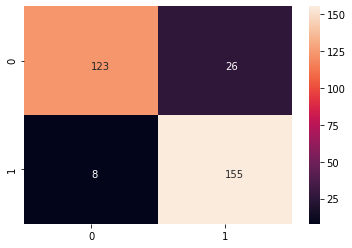

In [18]:
# KNN

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

accuracy = metrics.accuracy_score(y_pred,y_test)
precision = metrics.precision_score(y_pred,y_test,pos_label=1)
recall = metrics.recall_score(y_pred,y_test,pos_label=1)
f1_score = metrics.f1_score(y_pred,y_test,pos_label=1)

print("Accuracy : " +str(accuracy))
print("Precision : " +str(precision))
print("recall : " +str(recall))
print("f1 Score : " +str(f1_score))

cm = confusion_matrix(y_test, y_pred)
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)

akws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm,annot=True, annot_kws=akws,fmt="d")

Accuracy : 0.625
Precision : 0.3496932515337423
recall : 0.8382352941176471
f1 Score : 0.4935064935064935


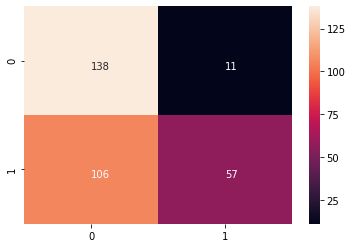

In [14]:
# Naive Bayes

modelnb = GaussianNB()
modelnb.fit(X_train, y_train)
nbpred = modelnb.predict(X_test)

accuracy = metrics.accuracy_score(nbpred,y_test)
precision = metrics.precision_score(nbpred,y_test,pos_label=1)
recall = metrics.recall_score(nbpred,y_test,pos_label=1)
f1_score = metrics.f1_score(nbpred,y_test,pos_label=1)

print("Accuracy : " +str(accuracy))
print("Precision : " +str(precision))
print("recall : " +str(recall))
print("f1 Score : " +str(f1_score))

cm = confusion_matrix(y_test, nbpred)
labels = [0, 1]
cm = confusion_matrix(y_test, nbpred, labels)

akws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm,annot=True, annot_kws=akws,fmt="d")

Accuracy : 0.9326923076923077
Precision : 1.0
recall : 0.8858695652173914
f1 Score : 0.9394812680115274


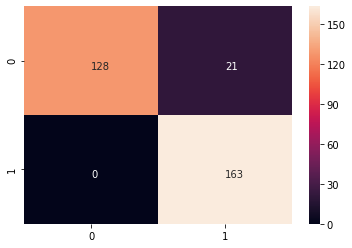

In [15]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtpred = dt.predict(X_test)

accuracy = metrics.accuracy_score(dtpred,y_test)
precision = metrics.precision_score(dtpred,y_test,pos_label=1)
recall = metrics.recall_score(dtpred,y_test,pos_label=1)
f1_score = metrics.f1_score(dtpred,y_test,pos_label=1)

print("Accuracy : " +str(accuracy))
print("Precision : " +str(precision))
print("recall : " +str(recall))
print("f1 Score : " +str(f1_score))

cm = confusion_matrix(y_test, dtpred)
labels = [0, 1]
cm = confusion_matrix(y_test, dtpred, labels)

akws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm,annot=True, annot_kws=akws,fmt="d")

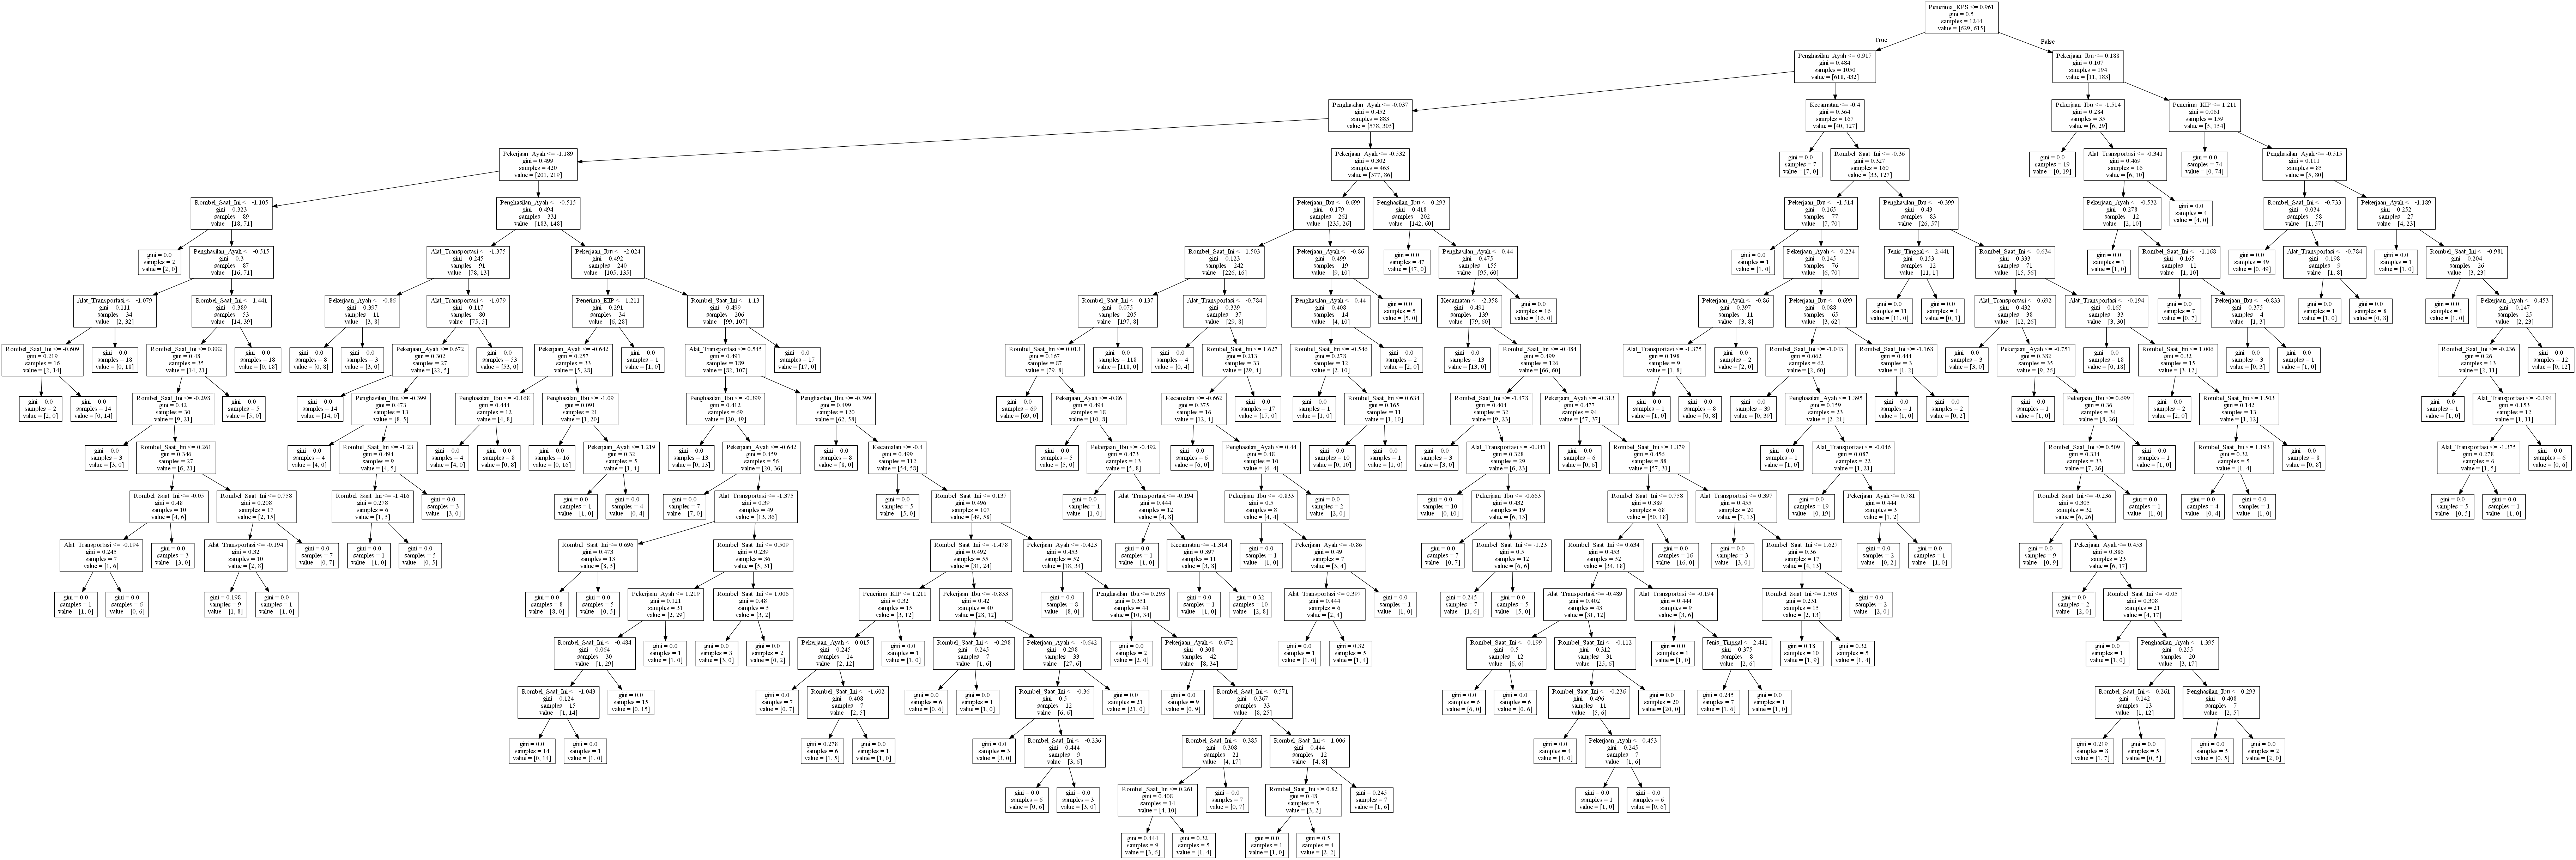

In [16]:
att = ['Kecamatan',
 'Jenis_Tinggal',
 'Alat_Transportasi',
 'Penerima_KPS','Pekerjaan_Ayah','Penghasilan_Ayah','Pekerjaan_Ibu','Penghasilan_Ibu','Rombel_Saat_Ini','Penerima_KIP']

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=att)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())